<a href="https://colab.research.google.com/github/robert-mp/DogsvsCatsNN/blob/main/DogsvsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [7]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [8]:
base_dir=os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'validation')

train_cats_dir= os.path.join(train_dir, 'cats')
train_dogs_dir= os.path.join(train_dir, 'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [11]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [15]:
BATCH_SIZE= 100
IMG_SHAPE = 150

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./225) #Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen= train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
val_data_gen= validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=validation_dir,
                                                          shuffle=False,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
sample_training_images,_=next(train_data_gen)

In [21]:
#This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


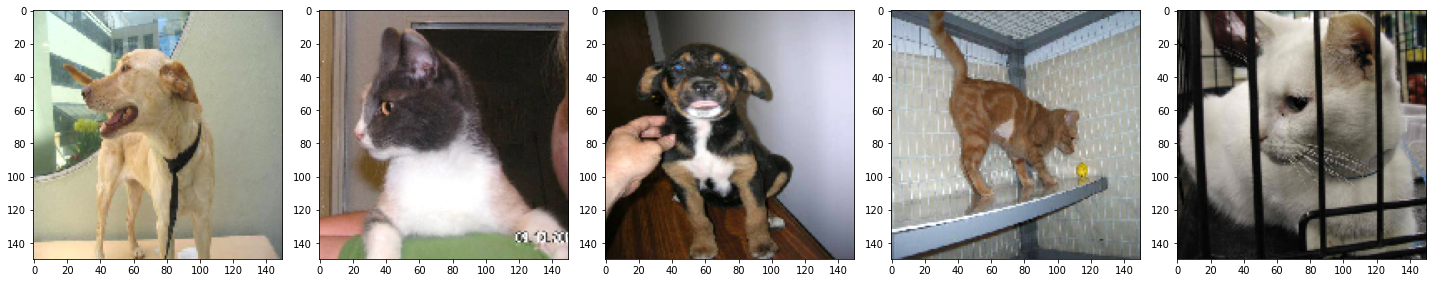

In [22]:
plotImages(sample_training_images[:5])

In [23]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
EPOCHS = 10
history= model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
20/20 [==============================] - 21s 516ms/step - loss: 0.7132 - accuracy: 0.5260 - val_loss: 0.6874 - val_accuracy: 0.6150
Epoch 2/10
20/20 [==============================] - 10s 505ms/step - loss: 0.6734 - accuracy: 0.5860 - val_loss: 0.6552 - val_accuracy: 0.6120
Epoch 3/10
20/20 [==============================] - 10s 502ms/step - loss: 0.6898 - accuracy: 0.5760 - val_loss: 0.6799 - val_accuracy: 0.5620
Epoch 4/10
20/20 [==============================] - 10s 504ms/step - loss: 0.6753 - accuracy: 0.5825 - val_loss: 0.6710 - val_accuracy: 0.6140
Epoch 5/10
20/20 [==============================] - 10s 489ms/step - loss: 0.6477 - accuracy: 0.6180 - val_loss: 0.6627 - val_accuracy: 0.5930
Epoch 6/10
20/20 [==============================] - 10s 501ms/step - loss: 0.6187 - accuracy: 0.6450 - val_loss: 0.6004 - val_accuracy: 0.6670
Epoch 7/10
20/20 [==============================] - 10s 492ms/step - loss: 0.5819 - accuracy: 0.6760 - val_loss: 0.5811 - val_accuracy: 0.7020

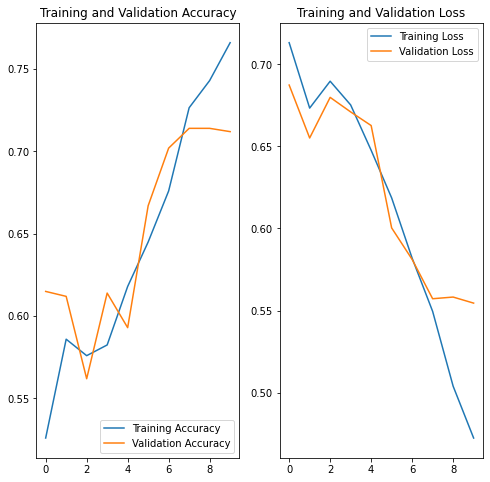

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Notice that our last layer (our classifier) consists of a Dense layer with 2 output units and a softmax activation function, as seen below:

     tf.keras.layers.Dense(2, activation='softmax')
Another popular approach when working with binary classification problems, is to use a classifier that consists of a Dense layer with 1 output unit and a sigmoid activation function, as seen below:

     tf.keras.layers.Dense(1, activation='sigmoid')
Either of these two options will work well in a binary classification problem. However, you should keep in mind, that if you decide to use a sigmoid activation function in your classifier, you will also have to change the loss parameter in the model.compile() method, from 'sparse_categorical_crossentropy' to 'binary_crossentropy', as shown below:

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])